<a href="https://colab.research.google.com/github/KathrineMondshain/rp3/blob/main/RP3_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

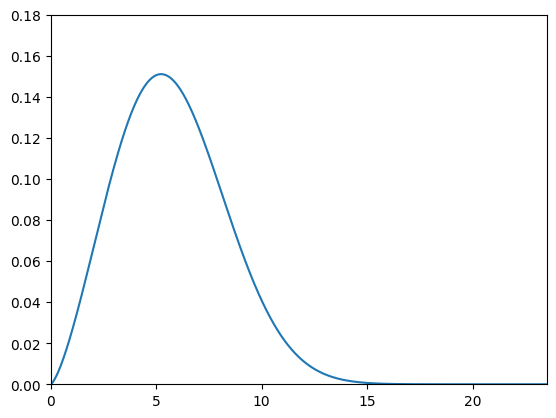

5.783225333336404
28174786155626.12


In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

k = 2.4229 #Weibull shape factor
c = 6.5226 #Weibull scale factor
n = 2876 #constant in power function

#Weibull probability density function
def weibull_prob_density(v):
    return (k/c)*(v/c)**(k-1)*np.exp(-(v/c)**k)

y_val = [0] #List of y values

#Numerical integration of the probability density times each wind speed
#Returns the expected value of wind speed
def expected_val(prob_density):

    n = 1000000  # Approaching infinity
    a = 0  # Approaching negative infinity
    b = 10*c  # Approaching infinity

    delta_x = (b - a) / n
    x_val= [a]
    approx = 0
    for i in range(1, n + 1):
        xi = x_val[i - 1] + delta_x
        x_val.append(xi)
        yi = prob_density(xi) * xi
        y_val.append(prob_density(xi))
        approx += yi
    approx *= delta_x
    plt.plot(x_val, y_val)
    plt.xlim(0, 23.5)
    plt.ylim(0, 0.18)
    plt.show()
    return approx

print(expected_val(weibull_prob_density))

#Numerical integration of the probability density multiplied by the power function
#Returns the expected power output at any given time, considering cut-in and cut-out speeds
def expected_power_output(prob_density, power_function, start, end):
    n = 1000000 #Approaching infinity
    a = start
    b = end

    delta_x = (b-a)/n
    x_val = [a]
    approx = 0
    for i in range(1,n+1):
        xi = x_val[i-1] + delta_x
        x_val.append(xi)
        yi = prob_density(xi) * power_function(xi)
        approx += yi
    approx *= delta_x
    return approx

#Function for power based on wind speed
def power(v):
  return n*(v**3)

#change t based on the time we are using
t = 365*24*60*60 #1 year in seconds

#Total time times expect power output gives the total energy output over a year
print(t*(expected_power_output(weibull_prob_density, power, 3, 25)))



